# Sentiment analysis of women's clothes reviews

The reviews of products users play a very important role in the e-commerce industry. The product quality can be measured by review given by customer. A new client can decided whether it buy or not given product based on previously reviews.

The text classification relies to assigned documents into one or many categories. One of the most useful text classification is Sentiment analysis. Is aimed to determine the user's point of view about given product, topic or service. 

In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


### Importing packages and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [5]:
df = pd.read_csv('WomensReviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling
First observations:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df.shape

(23486, 10)

In [8]:
#type of variables
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [9]:
df['Review Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

**Data preparation**

The dataset contains several variables such as Age, Title, Ratiing, Positive Feedback Count, Division Name, Department Name and Class name. In this case we used only two variables Review Text and Recommended IND as a predictor and target class variable.

**Review Text** is a review from customers and will be used as predictor variable.

**Recommended** is a recommendation from customers, where the product  1 is recommended, 0 is not recommended and  will be used as target variable.

In [10]:
review = df[['Review Text', 'Recommended IND']]
review.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [11]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [12]:
review.isnull().sum()

Review         845
Recommended      0
dtype: int64

Delate missing values:

In [13]:
review.dropna(subset=['Review'], inplace=True)

In [14]:
review.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [15]:
review['Review'] = review['Review'].astype(str)

In [16]:
review.shape

(22641, 2)

Checking Proportion Target Class Variable:

In [17]:
review['Recommended'].value_counts()

1    18540
0     4101
Name: Recommended, dtype: int64

Text(0.5, 1.0, 'Proportion Target Class')

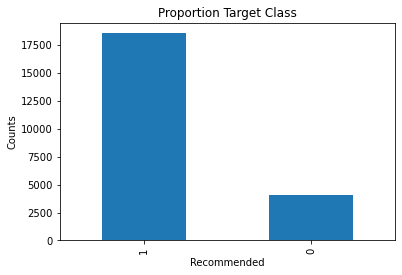

In [18]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

###  Text Mining

In this step we change text to tokens and convertion all of the words to lower case.  Next we remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 

The function to remove punctuation and change to **tokens**:

In [19]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [20]:
review['Review_clear'] = review['Review'].apply(tokens)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress it s sooo pretty i happened to...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit it s fun flirty...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...


In [21]:
review['Review_clear'] = review['Review_clear'].astype(str)

#### Stop words

First we extracting the stopwords from nltk library, then we adding some clothing stopwords and build function to remove stop words:

In [22]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [23]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [24]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [25]:
review['Review_clear'] = review['Review_clear'].apply(stopwords)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


**Removing all numbers (weight, size etc.)**

We remove numbers from text, since numbers doesn't give much importance to get the main words:

In [26]:
review['Review_clear'][267]

'love look quality amp say fits true size way short amp amp tall wish came tall sizes'

In [27]:
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)        

In [28]:
review['Review_clear'] = review['Review_clear'].apply(numbers)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [29]:
review['Review_clear'][267]

'love look quality amp say fits true size way short amp amp tall wish came tall sizes'

**Normalization**

The next step is the normalization of words in the corpus by transform all of different forms of the word into one. The two methods that exist for this purpose are Stemming and Lemmatization. We used the Lemmatization one.

In [30]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [31]:
review['Review_clear'] = review['Review_clear'].apply(lemma)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [32]:
review['Review_clear'][1]

'love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite'

### WordCloud - Repetition of words

Now we create a Word Clouds for reviews, representing most common words in each target class.

Word cloud is a excellent way to represent text data, where the size and color of each word appears in the wordcloud show its frequency or importance. 

In [33]:
positive = review[review.Recommended== 1]
negative = review[review.Recommended== 0]
positive.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...
6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [34]:
negative.head()

,Review,Recommended,Review_clear
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
5,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one petite foot tall us...
10,Dress runs small esp where the zipper area run...,0,run small esp zipper area run ordered sp typic...
22,"First of all, this is not pullover styling. th...",0,first pullover styling side zipper purchased k...
25,"Loved the material, but i didnt really look at...",0,loved didnt really look long purchased large m...


In [35]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [36]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would tak'

**Most Common words in Recommended Review**

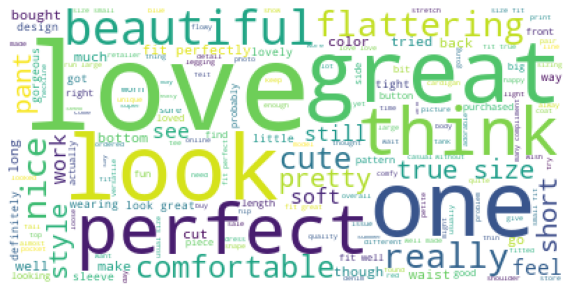

In [38]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="antialiased")
plt.axis("off")
plt.show()

### Models

We use the following classification models:
- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [73]:
X = review['Review_clear']
y = review['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In the next step we create a numerical feature vector for each document:

In [74]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

17201

#### Logistic regression

Now we train the model with n-grams:

In [75]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.8820931773018327
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       877
           1       0.91      0.95      0.93      3652

    accuracy                           0.88      4529
   macro avg       0.83      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529



#### Naive Bayes 

To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn.

In [77]:
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [78]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8335173327445352
              precision    recall  f1-score   support

           0       0.94      0.15      0.26       877
           1       0.83      1.00      0.91      3652

    accuracy                           0.83      4529
   macro avg       0.88      0.57      0.58      4529
weighted avg       0.85      0.83      0.78      4529



#### Support Vector Machine (SVM)

In [79]:
model_svm = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm',SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3, random_state=42)),
                    ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_svm.predict(X_test)

In [80]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.8074630161183485
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       877
           1       0.81      1.00      0.89      3652

    accuracy                           0.81      4529
   macro avg       0.90      0.50      0.45      4529
weighted avg       0.84      0.81      0.72      4529



#### Random Forest

In [81]:
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [82]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.8551556635018768
              precision    recall  f1-score   support

           0       0.82      0.32      0.46       877
           1       0.86      0.98      0.92      3652

    accuracy                           0.86      4529
   macro avg       0.84      0.65      0.69      4529
weighted avg       0.85      0.86      0.83      4529



#### Ada  Boosting

In [90]:
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [91]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.8542724663281077
              precision    recall  f1-score   support

           0       0.69      0.45      0.54       877
           1       0.88      0.95      0.91      3652

    accuracy                           0.85      4529
   macro avg       0.78      0.70      0.73      4529
weighted avg       0.84      0.85      0.84      4529



**Which one is the best Model?**

In [103]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
svm_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)

In [105]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 'Random Forest', 'AdaBoosting'],
                      'Score': [log_acc, nb_acc, svm_acc, rf_acc, ada_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.882093
3,Random Forest,0.855156
4,AdaBoosting,0.854272
1,Naive Bayes,0.833517
2,Support Vector Machines,0.807463


### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 